In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_apy_keys

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_apy_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bdaf3e8151a19ca98ef77e9d31475625


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | ibotirama
Processing Record 8 of Set 1 | bethanien
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | champerico
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | tafresh
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | rundu
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | eyl
Processing Record 21 of Set 1 | joensuu
Processing Record 22 of Set 1 | abu samrah
Processing Record 23 of Set 1 | saryshagan
City not foun

Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 4 | aksay
Processing Record 42 of Set 4 | independencia
Processing Record 43 of Set 4 | ilo
Processing Record 44 of Set 4 | edwardsville
Processing Record 45 of Set 4 | magadan
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | igarka
Processing Record 48 of Set 4 | belaya gora
Processing Record 49 of Set 4 | goma
Processing Record 50 of Set 4 | skibbereen
Processing Record 1 of Set 5 | chuy
Processing Record 2 of Set 5 | enterprise
Processing Record 3 of Set 5 | horodkivka
Processing Record 4 of Set 5 | bilma
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | tyukhtet
Processing Record 7 of Set 5 | krasnyy chikoy
Processing Record 8 of Set 5 | alamosa
Processing Record 9 of Set 5 | axim
Processing Record 10 of Set 5 | tuktoyaktuk
Processing Record 11 of Set 5 | brae
Processing Record 12 of Set 5 | 

City not found. Skipping...
Processing Record 25 of Set 8 | henties bay
Processing Record 26 of Set 8 | marathon
Processing Record 27 of Set 8 | rogun
City not found. Skipping...
Processing Record 28 of Set 8 | amderma
City not found. Skipping...
Processing Record 29 of Set 8 | sangar
Processing Record 30 of Set 8 | autazes
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | sola
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | oga
Processing Record 35 of Set 8 | flinders
Processing Record 36 of Set 8 | yulara
Processing Record 37 of Set 8 | cherskiy
Processing Record 38 of Set 8 | pinhao
Processing Record 39 of Set 8 | maniitsoq
Processing Record 40 of Set 8 | seoul
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | kinablangan
Processing Record 43 of Set 8 | laguna
Processing Record 44 of Set 8 | namibe
Processing Record 45 of Set 8 | zhigansk
Processing Record 46 of Set 8 | gol
Pr

Processing Record 11 of Set 12 | khonuu
City not found. Skipping...
Processing Record 12 of Set 12 | panguna
Processing Record 13 of Set 12 | taoudenni
Processing Record 14 of Set 12 | phibun mangsahan
Processing Record 15 of Set 12 | tolstoy-yurt
Processing Record 16 of Set 12 | sahrak
City not found. Skipping...
Processing Record 17 of Set 12 | izmir
Processing Record 18 of Set 12 | beira
Processing Record 19 of Set 12 | amga
Processing Record 20 of Set 12 | three hills
Processing Record 21 of Set 12 | sur
Processing Record 22 of Set 12 | kismayo
Processing Record 23 of Set 12 | hongjiang
Processing Record 24 of Set 12 | gangtok
Processing Record 25 of Set 12 | puerto penasco
Processing Record 26 of Set 12 | port-gentil
Processing Record 27 of Set 12 | hun
Processing Record 28 of Set 12 | hudson bay
Processing Record 29 of Set 12 | bambanglipuro
Processing Record 30 of Set 12 | crab hill
City not found. Skipping...
Processing Record 31 of Set 12 | sokolka
Processing Record 32 of Set 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,28.40,100,90,2.30,CA,2021-01-13 22:26:30
1,Ilulissat,69.2167,-51.1000,23.00,86,75,11.50,GL,2021-01-13 22:24:17
2,Kaitangata,-46.2817,169.8464,66.99,75,68,8.99,NZ,2021-01-13 22:28:47
3,Cape Town,-33.9258,18.4232,73.99,73,0,8.05,ZA,2021-01-13 22:26:17
4,Qaanaaq,77.4840,-69.3632,-2.31,83,0,5.39,GL,2021-01-13 22:28:48
5,Hobyo,5.3505,48.5268,75.42,79,8,22.39,SO,2021-01-13 22:28:48
6,Ibotirama,-12.1853,-43.2206,76.80,76,64,2.35,BR,2021-01-13 22:28:48
7,Bethanien,-26.5020,17.1583,79.70,55,95,10.74,NA,2021-01-13 22:28:48
8,Butaritari,3.0707,172.7902,81.50,76,92,20.83,KI,2021-01-13 22:28:48
9,Champerico,14.3000,-91.9167,89.60,58,20,11.50,GT,2021-01-13 22:28:48


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2021-01-13 22:26:30,55.7435,-97.8558,28.40,100,90,2.30
1,Ilulissat,GL,2021-01-13 22:24:17,69.2167,-51.1000,23.00,86,75,11.50
2,Kaitangata,NZ,2021-01-13 22:28:47,-46.2817,169.8464,66.99,75,68,8.99
3,Cape Town,ZA,2021-01-13 22:26:17,-33.9258,18.4232,73.99,73,0,8.05
4,Qaanaaq,GL,2021-01-13 22:28:48,77.4840,-69.3632,-2.31,83,0,5.39
5,Hobyo,SO,2021-01-13 22:28:48,5.3505,48.5268,75.42,79,8,22.39
6,Ibotirama,BR,2021-01-13 22:28:48,-12.1853,-43.2206,76.80,76,64,2.35
7,Bethanien,NA,2021-01-13 22:28:48,-26.5020,17.1583,79.70,55,95,10.74
8,Butaritari,KI,2021-01-13 22:28:48,3.0707,172.7902,81.50,76,92,20.83
9,Champerico,GT,2021-01-13 22:28:48,14.3000,-91.9167,89.60,58,20,11.50


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

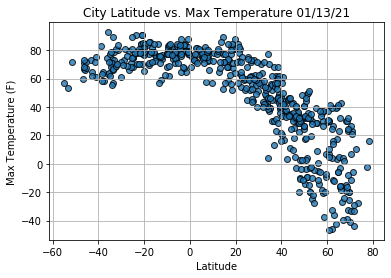

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

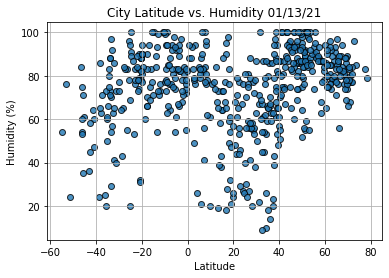

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

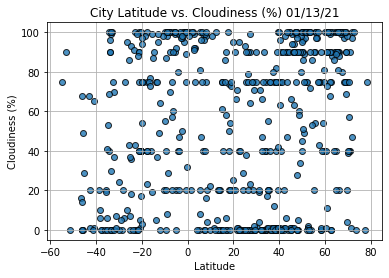

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

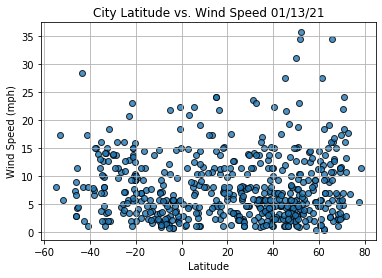

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()